# 01 — RQ1: Testing Behavior of AI Coding Agents

This notebook reproduces the full pipeline and results for **RQ1** of the MSR 2026 Challenge Track submission.

It will:
- Load the AIDev dataset from HuggingFace
- Run the RQ1 analysis pipeline
- Automatically generate all CSV outputs
- Automatically generate all ACM-style figures
- Display summary results

**All heavy computation is handled by the Python module:**
```
msr2026/rq1/run_rq1.py
```

## 1. Import and Setup

In [1]:
import sys, os
sys.path.append("../src")

from src.msr2026.rq1.run_rq1 import run_rq1

import pandas as pd
from IPython.display import Image, display

print("Environment ready.")

Environment ready.


## 2. Run the full RQ1 pipeline
This will generate:
- All figures → `output/figures/RQ1/`
- All CSV tables → `output/tables/RQ1/`

This step may take around 10–20 seconds depending on system performance.

In [2]:
run_rq1()
print("✔ RQ1 Execution completed.")


===================== Running RQ1 =====================
Loading RQ1 data from HuggingFace...
Extracting test file indicators...
Merging PR-level data...


E:\ubc study\MSR-paper\MSR-2026\src\msr2026\rq1\run_rq1.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pr["contains_test"] = pr["contains_test"].fillna(False)


Computing agent-level metrics...
Saving CSV outputs...
✔ CSV tables saved to: ../output/tables/RQ1
✔ Behavior matrix saved.
✔ Task-type matrix saved.
✔ RQ1 completed — Figures saved to: ../output/figures/RQ1
✔ RQ1 Execution completed.


## 3. Load and Display CSV Outputs
RQ1 produces 5 CSV tables:
- Test inclusion rate
- Average number of test files
- Conditional average (only PRs that include tests)
- Full behavior matrix
- Task-type inclusion matrix

In [3]:
import pandas as pd

TABLE_DIR = "../output/tables/RQ1/"

inc = pd.read_csv(TABLE_DIR + "rq1_test_inclusion.csv")
avg = pd.read_csv(TABLE_DIR + "rq1_average_test_files.csv")
cond = pd.read_csv(TABLE_DIR + "rq1_conditional_test_files.csv")
behavior = pd.read_csv(TABLE_DIR + "rq1_behavior_matrix.csv")
task = pd.read_csv(TABLE_DIR + "rq1_task_type_matrix.csv")

print("=== Test Inclusion Rate ===")
display(inc)

print("=== Average Test Files ===")
display(avg)

print("=== Conditional Test Contribution ===")
display(cond)

print("=== Behavior Heatmap Matrix ===")
display(behavior)

print("=== Task-Type Inclusion Matrix ===")
display(task)

=== Test Inclusion Rate ===


,agent,test_inclusion_rate
0,Claude_Code,0.037960
1,Copilot,0.036771
2,Cursor,0.009988
3,Devin,0.047337
4,OpenAI_Codex,0.011624


=== Average Test Files ===


,agent,avg_test_file_count
0,Claude_Code,0.535137
1,Copilot,0.629036
2,Cursor,0.087034
3,Devin,0.538764
4,OpenAI_Codex,0.178592


=== Conditional Test Contribution ===


,agent,conditional_avg_test_file_count
0,Claude_Code,14.097436
1,Copilot,17.106739
2,Cursor,8.714286
3,Devin,11.381392
4,OpenAI_Codex,15.364068


=== Behavior Heatmap Matrix ===


,agent,test_inclusion_rate,avg_test_file_count,conditional_avg_test_file_count
0,Claude_Code,0.037960,0.535137,14.097436
1,Copilot,0.036771,0.629036,17.106739
2,Cursor,0.009988,0.087034,8.714286
3,Devin,0.047337,0.538764,11.381392
4,OpenAI_Codex,0.011624,0.178592,15.364068


=== Task-Type Inclusion Matrix ===


,agent,chore,build,ci,docs
0,Claude_Code,0.571429,0.125000,0.000000,0.125000
1,Copilot,0.357143,0.231405,0.149254,0.091703
2,Cursor,0.200000,0.238095,0.062500,0.028986
3,Devin,0.174377,0.093750,0.186441,0.066129
4,OpenAI_Codex,0.328605,0.091837,0.056818,0.113619


## 4. Display Generated Figures
This will load all PNG figures produced by the RQ1 pipeline.

Generated figures:
- rq1_avg_test_files.png


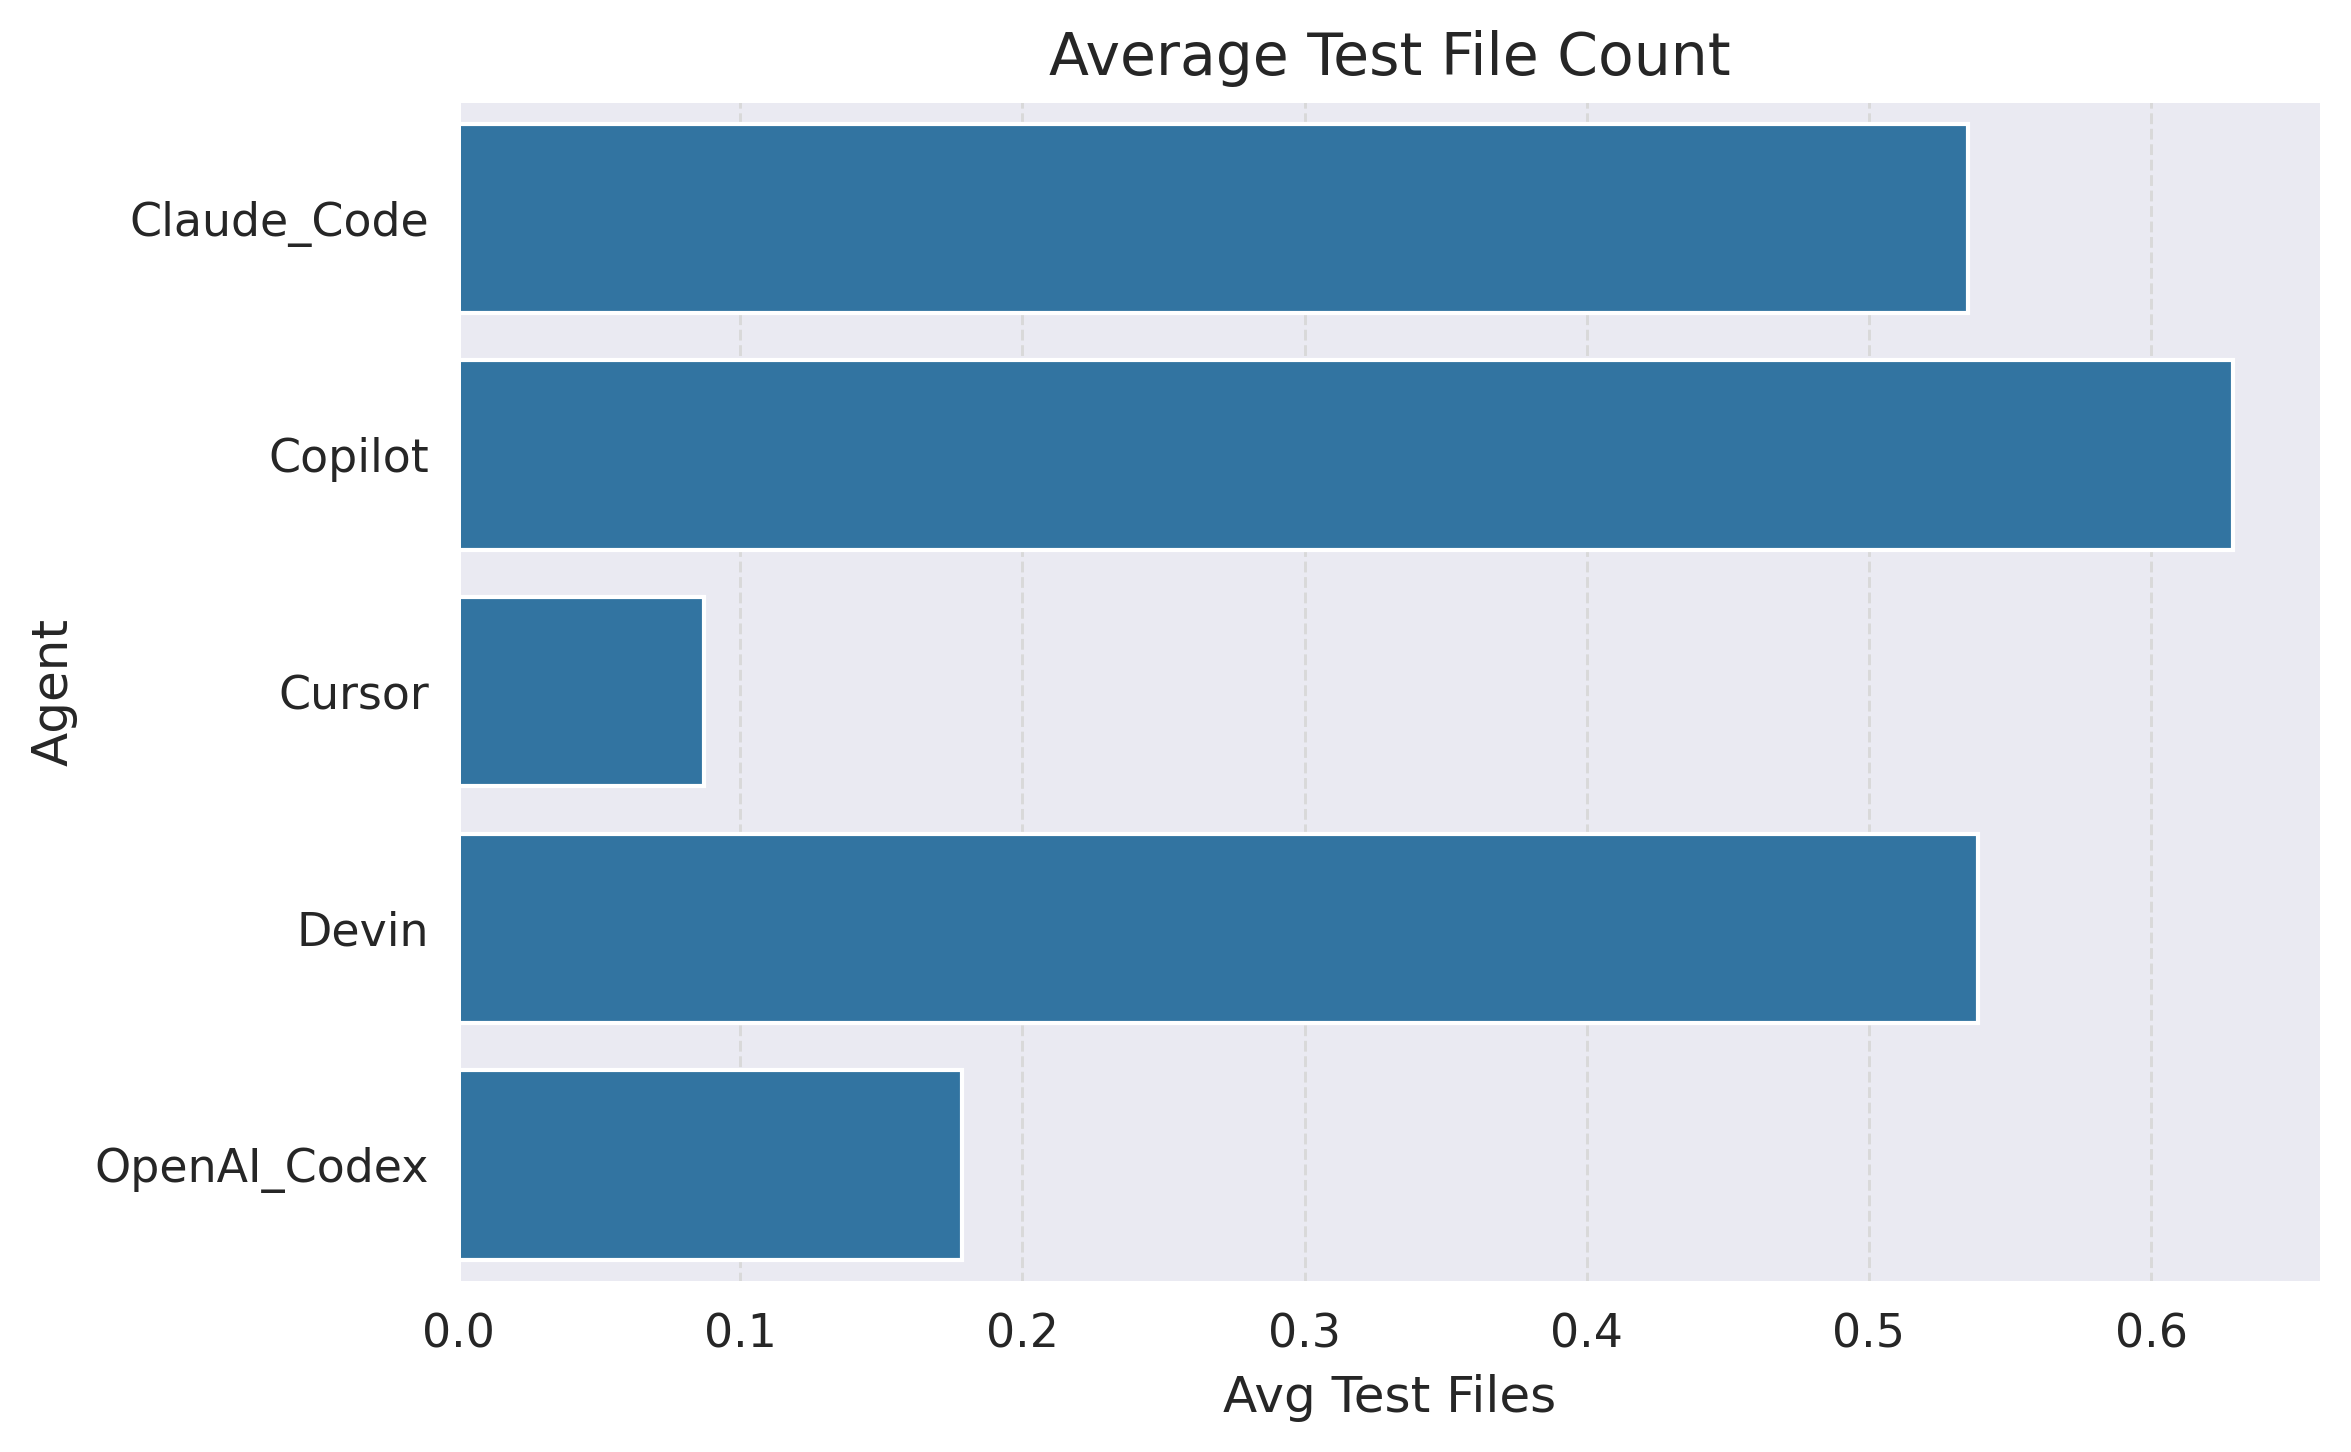

- rq1_behavior_heatmap.png


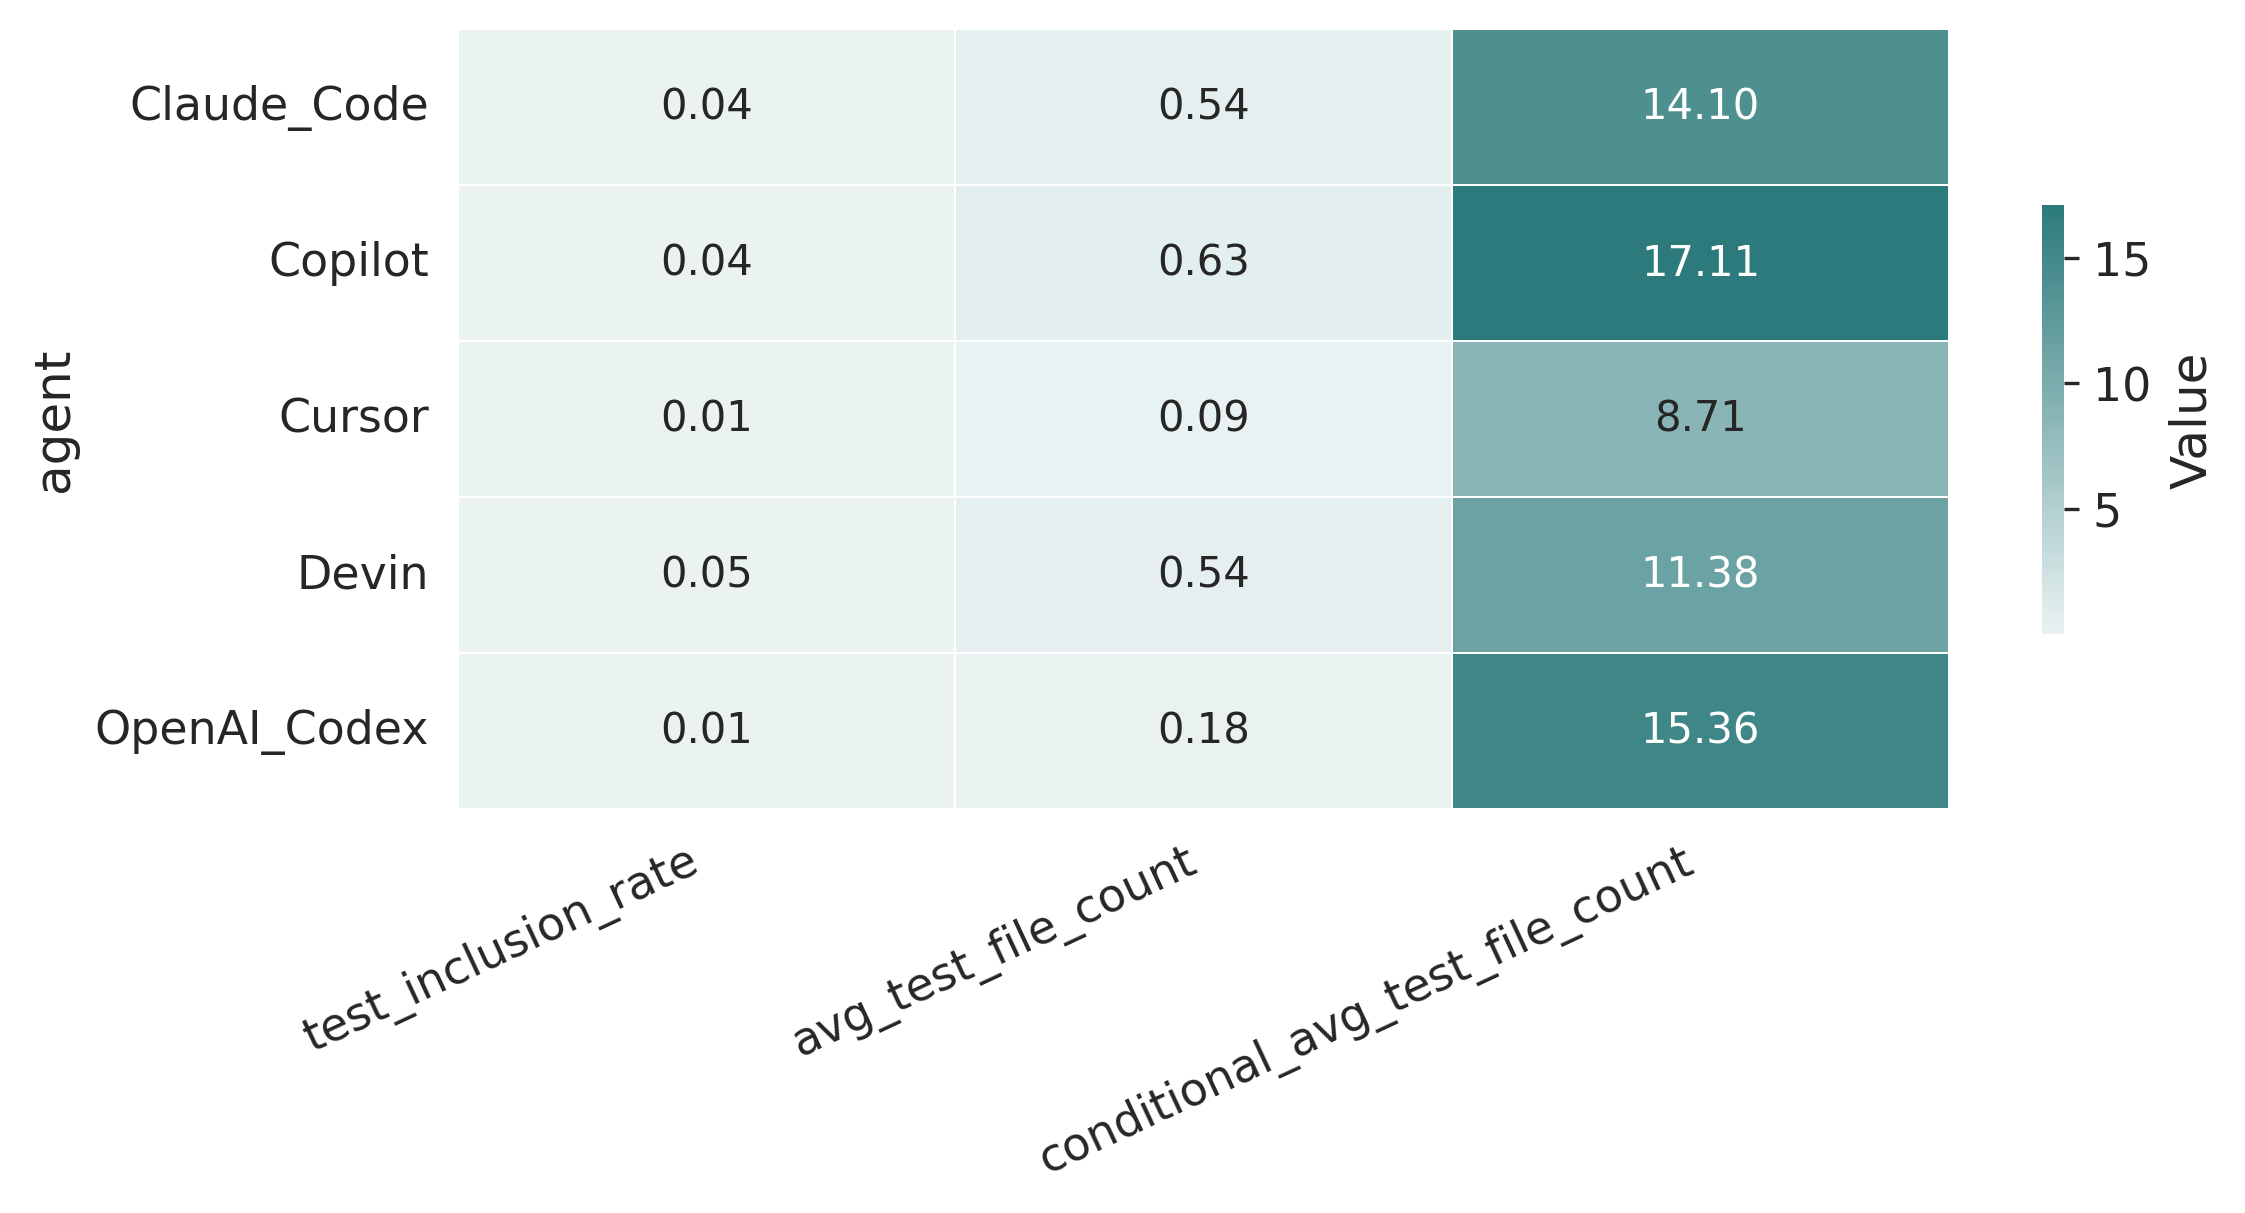

- rq1_conditional.png


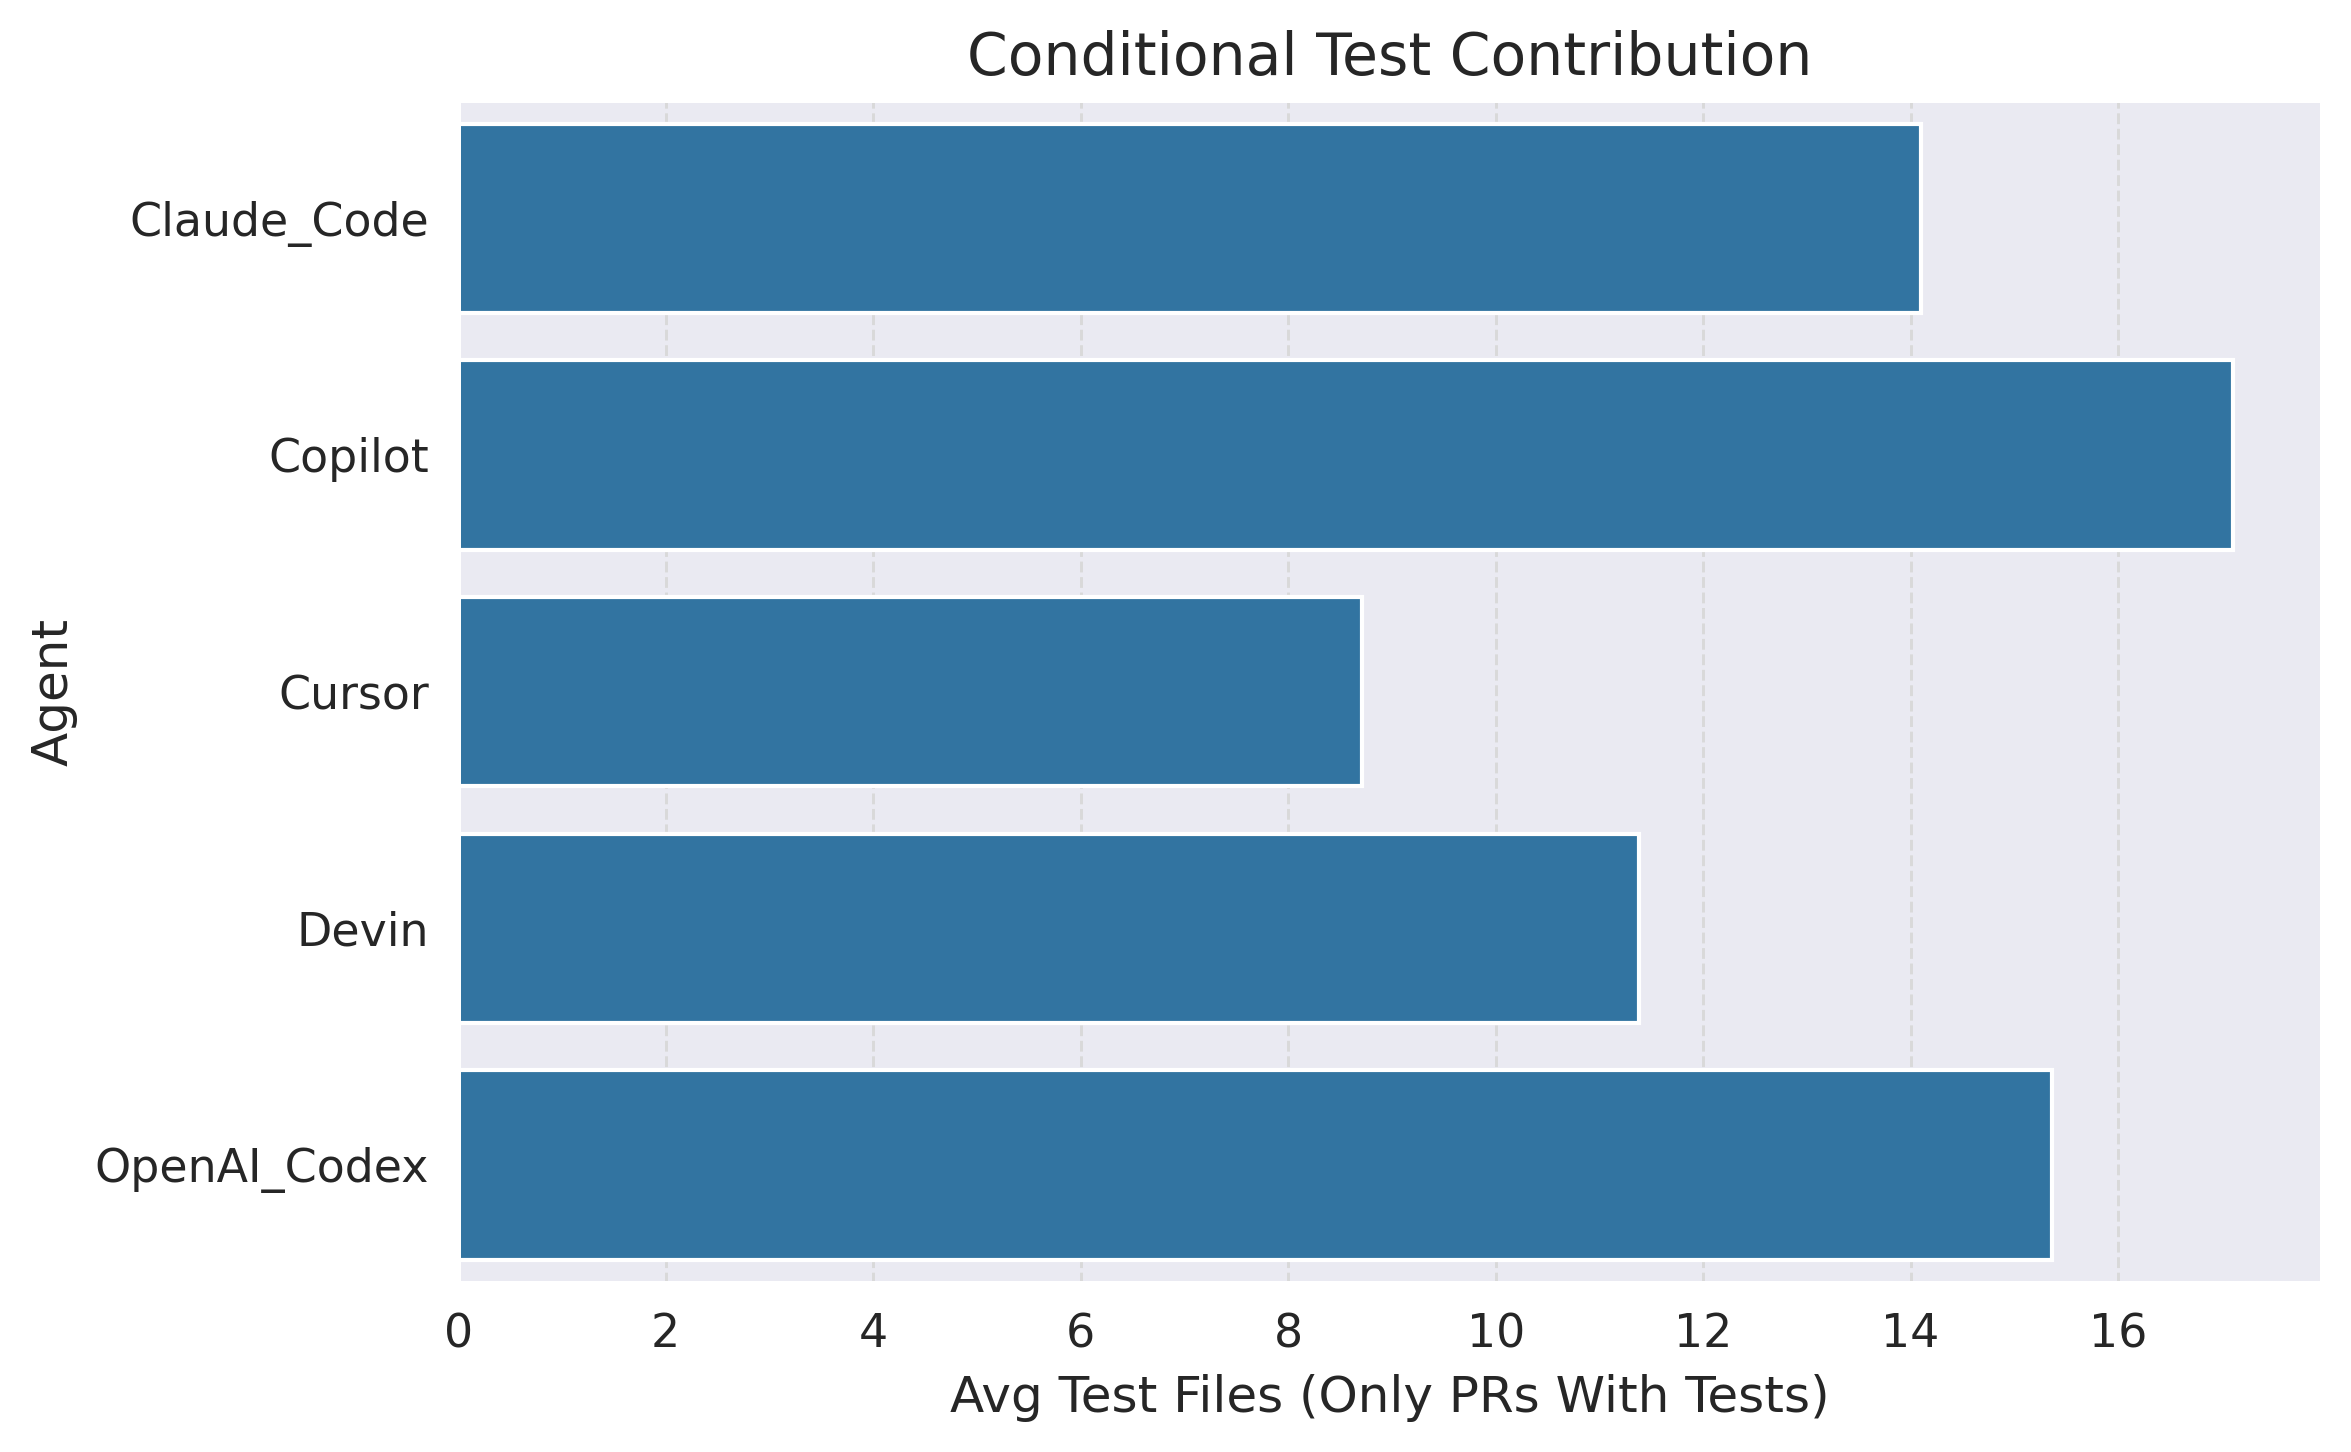

- rq1_task_type_heatmap.png


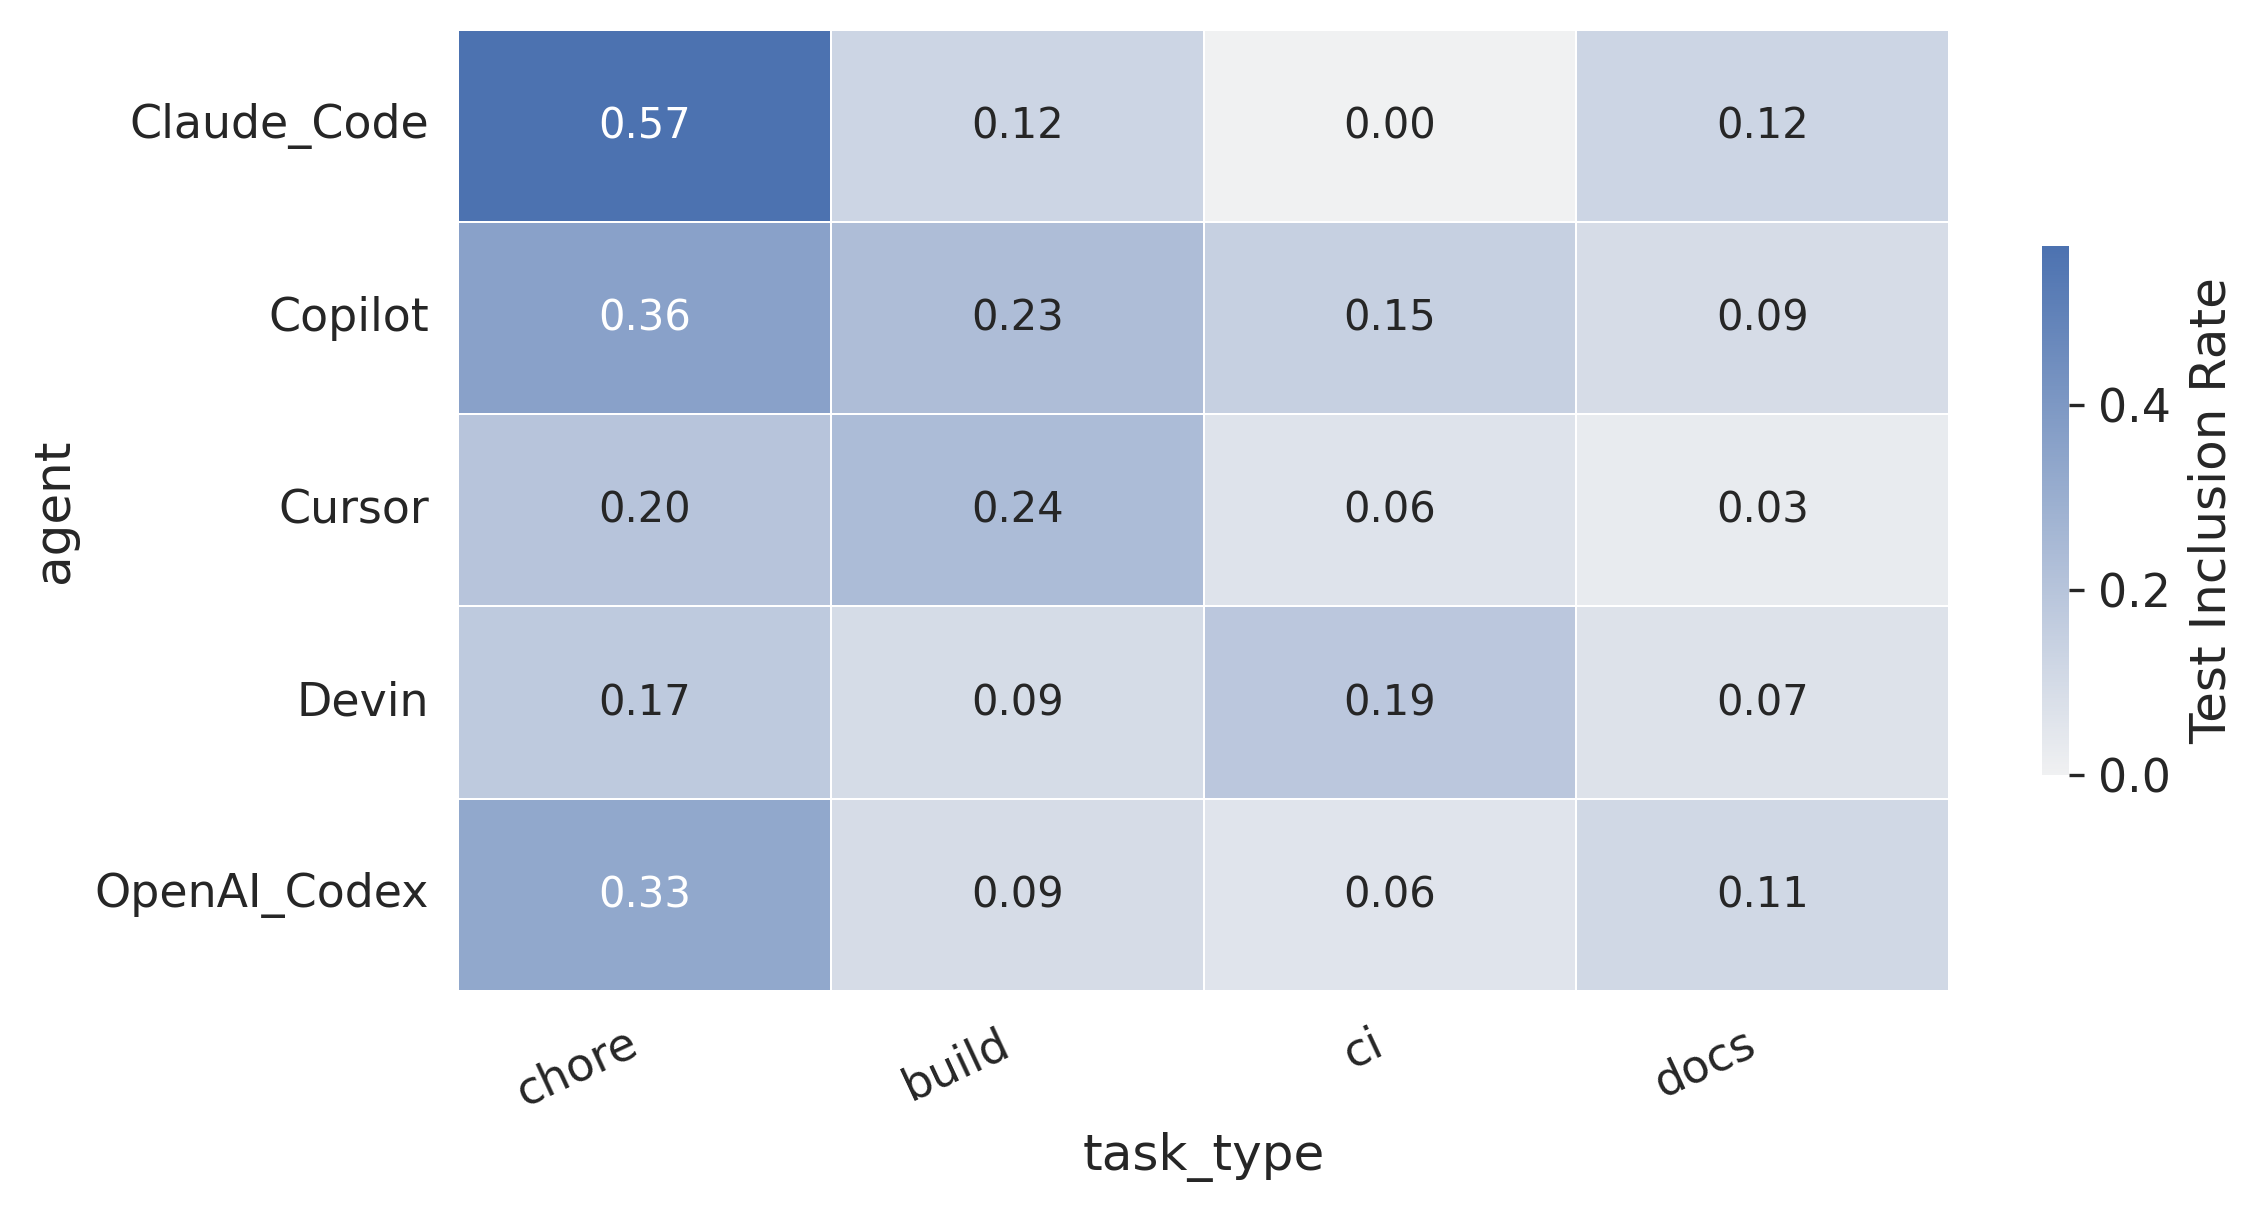

- rq1_test_inclusion.png


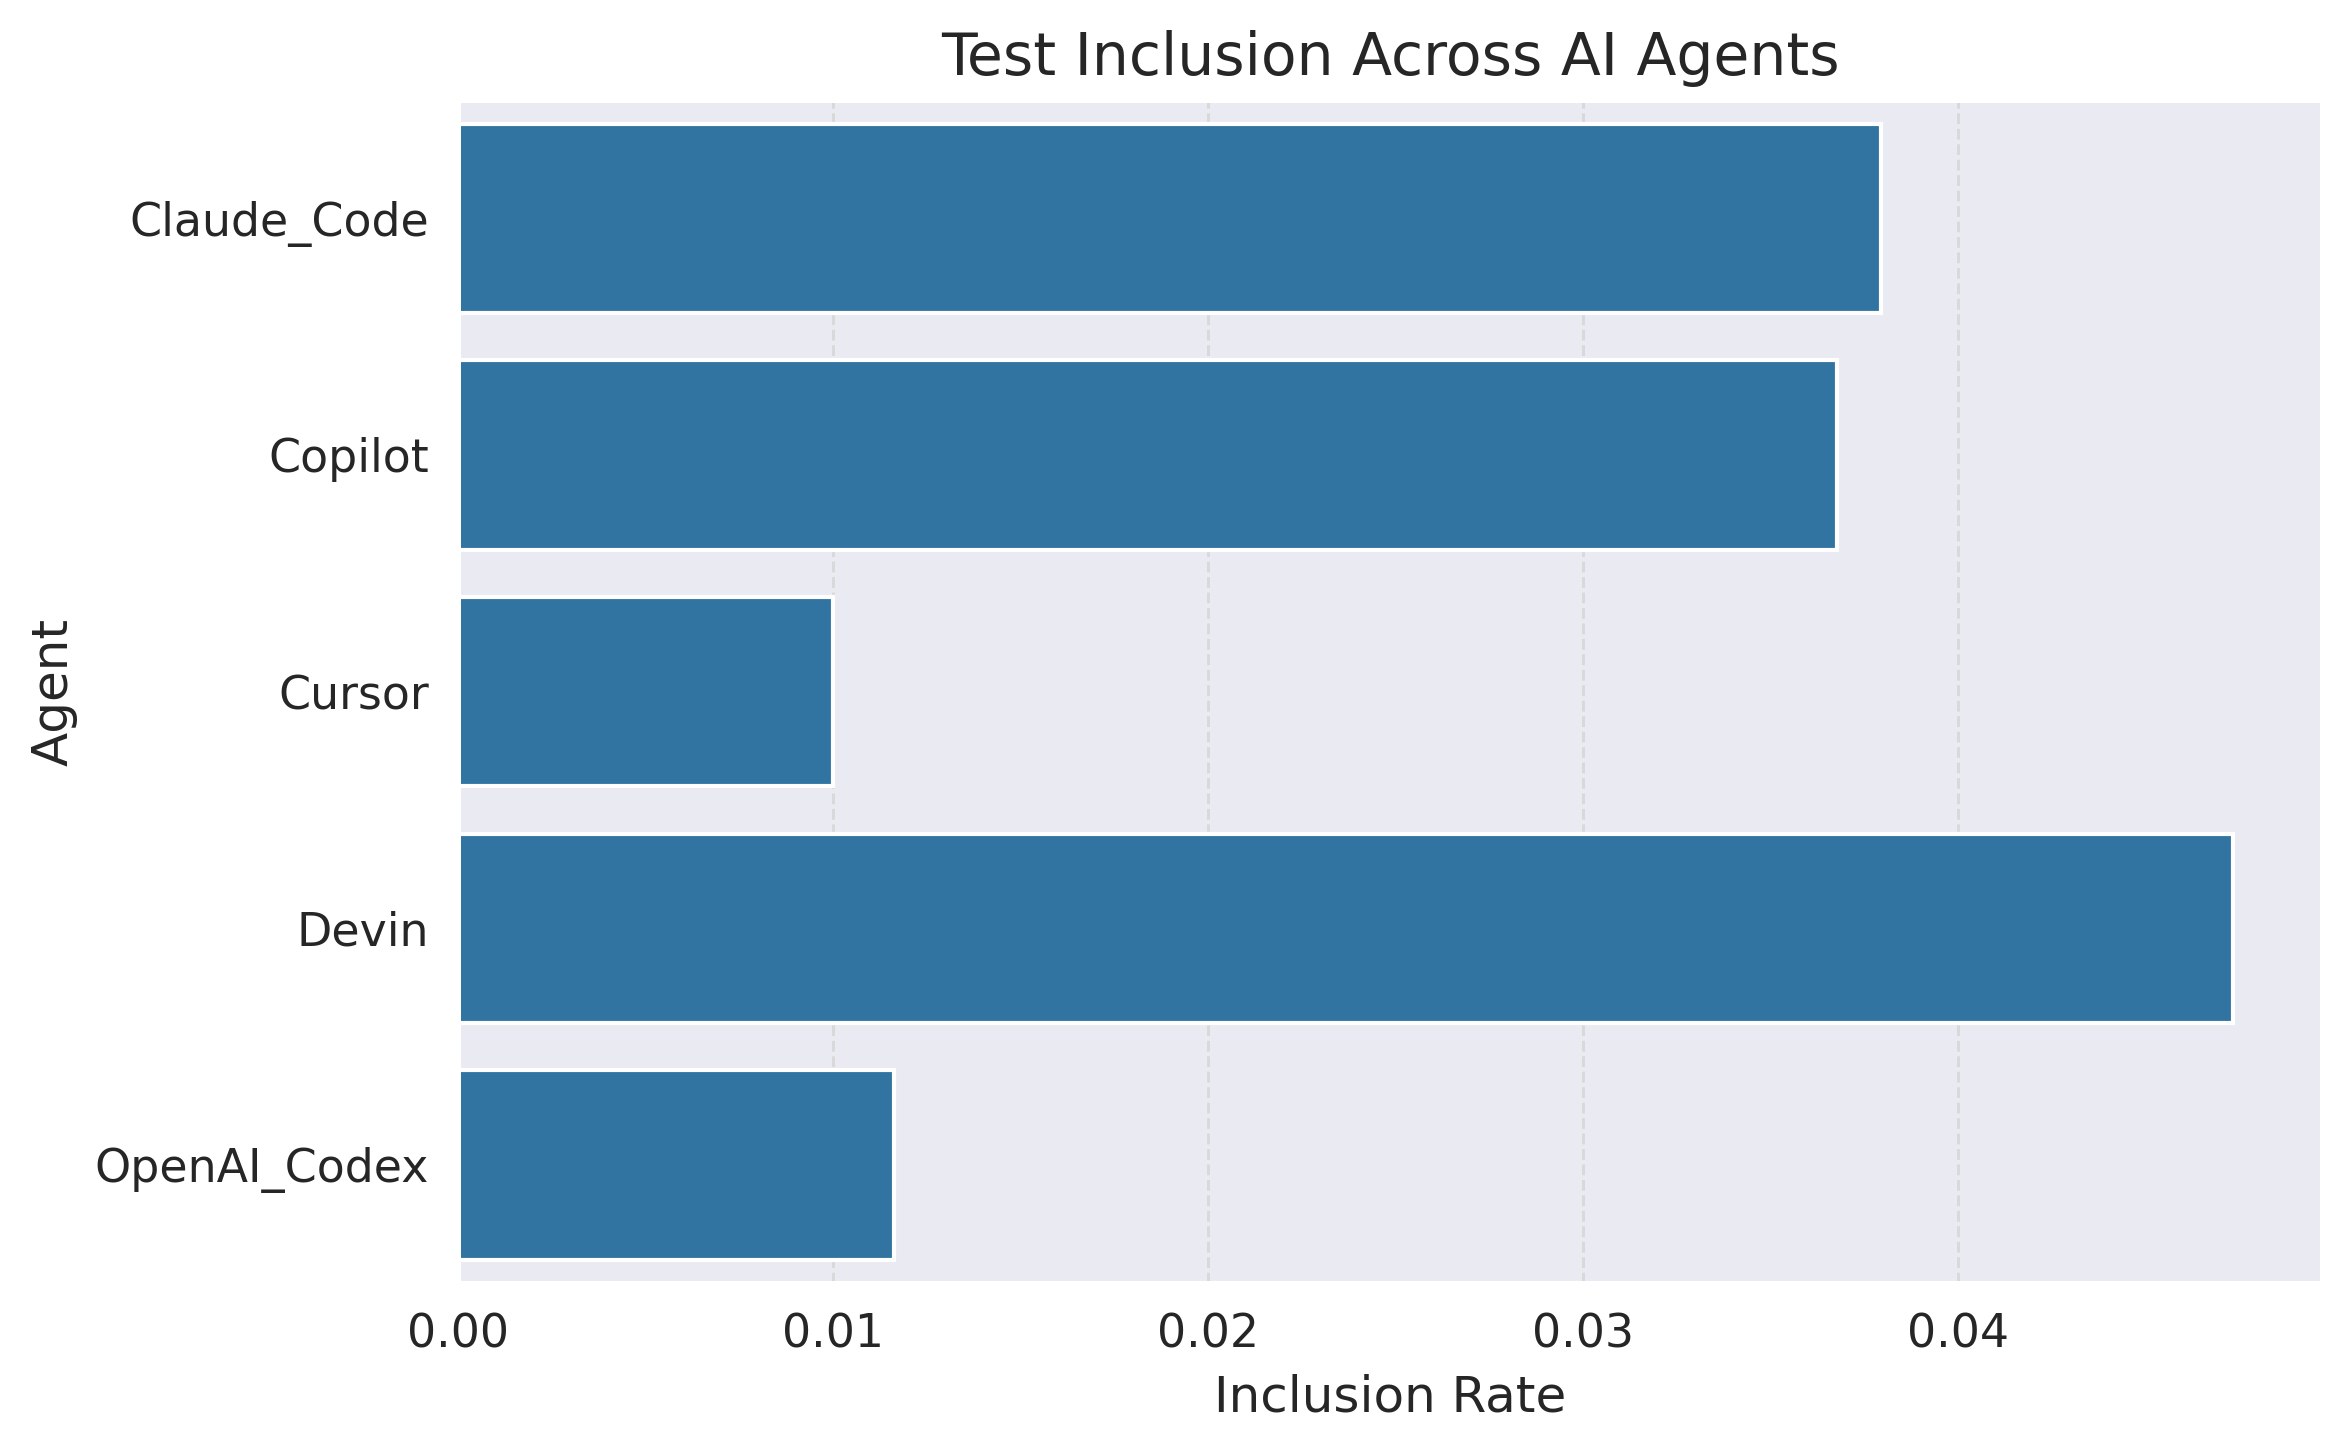

- rq1_three_panel.png


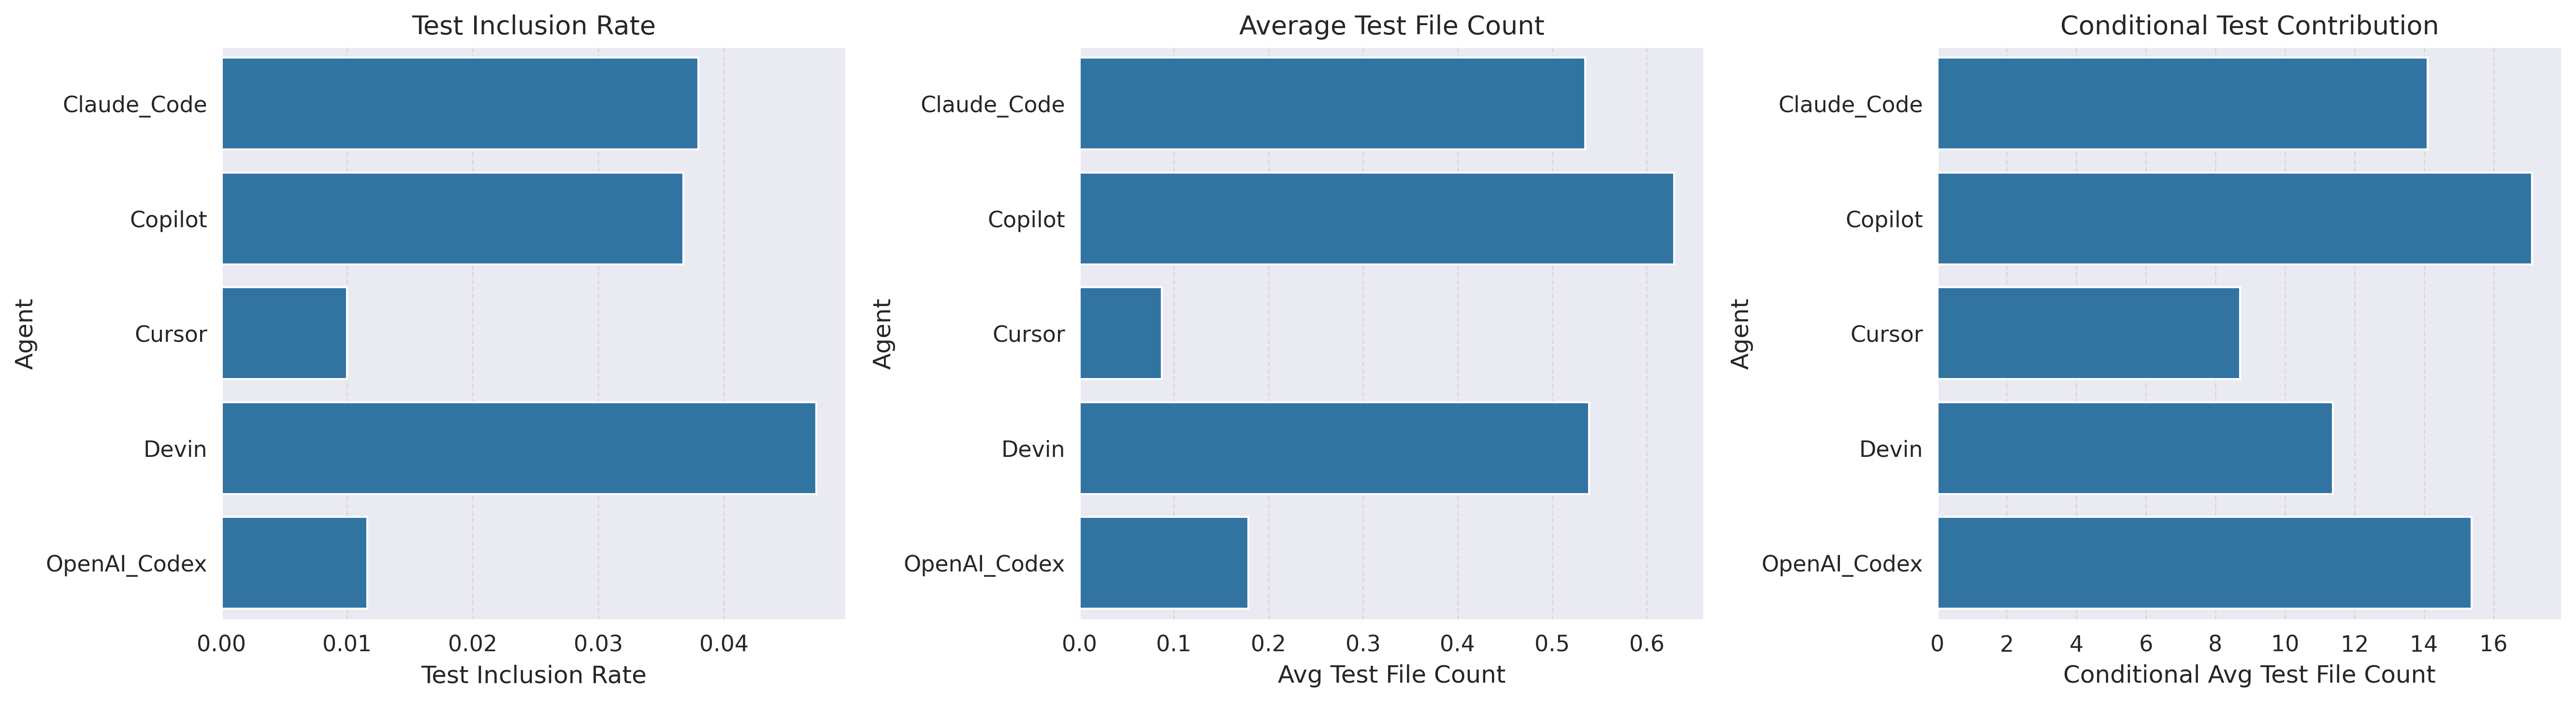

In [4]:
FIG_DIR = "../output/figures/RQ1/"

print("Generated figures:")
for f in os.listdir(FIG_DIR):
    if f.endswith(".png"):
        print("-", f)
        display(Image(filename=os.path.join(FIG_DIR, f)))